# Toronto Parking Ticket Revenues
# Capstone Project
## Sprint 1

### Alla B.
Email: allaboyers@gmail.com

### October 19, 2023

### Table of Contents
1. [Overview: The Problem and Opportunity](#Overview:-The-Problem-and-Opportunity)
2. [Part 1 - The Data: Explanation of the Data](#Part-1---The-Data:-Explanation-of-the-Data)
3. [Part 2 - Basic Cleaning and EDA](#Part-2---Basic-Cleaning-and-EDA)
4. [Part 3 - Next Steps](#Part-3---Next-Steps)

## Overview: The Problem and Opportunity

Parking tickets across the city generate millions in revenue for the City of Toronto every year. However, the City of Toronto's revenue from parking tickets has been declining year over year. There is an opportunity to reverse this decline or even increase ticket revenue by making the City of Toronto's Administrative Penalty System (APS) more efficient. Using machine learning can enhance the efficiency of the APS, identifying priority areas where illegal parking has been observed. These areas can be sorted by locations with the highest number of parking infractions (e.g., in the last month or week) and by the highest ticket amounts issued. The impact of an efficient model can make the city safer and more attractive to residents and tourists. The potential revenue opportunity could be as significant as [30 million dollars a year](https://www.thestar.com/opinion/contributors/the-number-of-parking-tickets-has-plunged-in-cash-strapped-toronto-why-the-lax-enforcement/article_588cb2a7-843e-5e23-aef7-d8f2ff9afdb1.html#:~:text=The%20city's%20annual%20revenue%20from,estimated%20%2490%20million%20in%202021.) . Furthermore, by mitigating gridlocks, we can prevent potential damage to economic prosperity, an issue estimated at [$6 billion by the Toronto Board of Trade](https://www.cbc.ca/news/canada/toronto/parking-rules-don-t-apply-to-all-1.1045718) (as of 2011).

## The Data: Explanation of the Data

The dataset for this project will be sourced from the [Open Data Portal of the City of Toronto](https://open.toronto.ca/dataset/parking-tickets/) (2020-2022). The dataset contains non-identifiable information relating to each parking ticket issued for each calendar year. The tickets are issued by Toronto Police Services (TPS) personnel as well as persons certified and authorized to issue tickets by TPS. The data set contains complete records only. Incomplete records in the City database are not included in the data set. Incomplete records may exist due to a variety of reasons e.g. the vehicle registration is out-of-province, tickets paid prior to staff entering the ticket data, etc. The volume of incomplete records relative to the overall volume is low and therefore presents insignificant impact to trend analysis.

| ITEM   NAME            | DESCRIPTION                                                  |
|------------------------|--------------------------------------------------------------|
|                        |                                                              |
| TAG_NUMBER_MASKED      | First three (3) characters masked   with asterisks           |
| DATE_OF_INFRACTION     | Date the infraction   occurred in YYYYMMDD format            |
| INFRACTION_CODE        | Applicable Infraction   code (numeric)                       |
| INFRACTION_DESCRIPTION | Short description of   the infraction                        |
| SET_FINE_AMOUNT        | Amount of set fine   applicable (in dollars)                 |
| TIME_OF_INFRACTION     | Time the infraction   occurred  in HHMM format (24-hr clock) |
| LOCATION1              | Code to denote   proximity (see table below)                 |
| LOCATION2              | Street address                                               |
| LOCATION3              | Code to denote   proximity (optional)                        |
| LOCATION4              | Street address   (optional)                                  |
| PROVINCE               | Province or state   code of vehicle licence plate            |
|                        |                                                              |
|                        |                                                              |
| Proximity Code Table   |                                                              |
| PROXIMITY CODE         | DESCRIPTION                                                  |
| AT                     | At                                                           |
| NR                     | Near                                                         |
| OPP                    | Opposite                                                     |
| R/O                    | Rear   of                                                    |
| N/S                    | North   Side                                                 |
| S/S                    | South   Side                                                 |
| E/S                    | East   Side                                                  |
| W/S                    | West   Side                                                  |
| N/O                    | North   of                                                   |
| S/O                    | South   of                                                   |
| E/O                    | East   of                                                    |
| W/O                    | West   of                                                    |

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in data: Create file paths of 29 `.csv files`. 

In [2]:
file_paths = ['Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.000.csv', 
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.001.csv',
            'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.002.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.003.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.004.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.005.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.000.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.001.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.002.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.003.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.004.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.005.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.006.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.007.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.008.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.009.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.010.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.011.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.012.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.013.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.014.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.000.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.001.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.002.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.003.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.004.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.005.csv',
             'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2022.006.csv']

In [3]:
# check
file_paths

['Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.000.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.001.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.002.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.003.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.004.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2020.005.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.000.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.001.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.002.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.003.csv',
 'Downloads/Capstone_Project_Data/parking_tickets_all/Parking_Tags_Data_2021.004.csv',
 'Downloads/Capstone_Project_Data/parking_t

In [4]:
# create an empty list to store DataFrames
dataframes = []

# iterate over each file and load it into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path, dtype={"time_of_infraction": str}) 
    # basic EDA showed there was a problem with data type of time_of_infraction column and converting it didn't 
    # fix the problem, added 'dtype' to read in the column as string
    dataframes.append(df)

# now we have a list of DataFrames, one for each .csv file


# combine all DataFrames into a single DataFrame
parking_df = pd.concat(dataframes, ignore_index=True)


In [5]:
# now we have all 29 files inserted in a single DataFrame
# check first five rows
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON


In [6]:
# check a random sample
parking_df.sample(5)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
3410160,***43181,20220426,192,STAND SIGNED TRANSIT STOP,150,1928,NR,5351 YONGE ST,NaN,NaN,ON
1257324,***98183,20201122,320,PARK NON-BUS-BUS PK ZNE DY/TM,150,1228,NR,244 VICTORIA ST,NaN,NaN,ON
2701432,***32539,20211123,207,PARK MACHINE-REQD FEE NOT PAID,30,1317,NR,76 RONCESVALLES AVE,NaN,NaN,ON
429828,***82108,20200311,415,PARK COMMERC LOAD ZONE NOT LDG,40,1231,OPP,2 SNOOKER ST,NaN,NaN,ON
1803075,***07923,20210614,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1359,S/S,BASIN ST,E/O,BOUCHETTE ST,ON


In [7]:
# check last rows
parking_df.tail()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
4635366,***17631,20221212,336,PARK-FAIL TO DISPLAY PERMIT,30,0946,NR,141 QUEENSDALE AVE,NaN,NaN,ON
4635367,***52578,20221212,312,PARKING MACH-NOT USED/NO FEE,75,0947,AT,465 HURON STREET,NaN,NaN,ON
4635368,***52962,20221212,4,PARK ON MUNICIPAL PROPERTY,30,0947,AT,100 GRANGEWAY AVE.,NaN,NaN,ON
4635369,***57475,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,0947,NR,199 NIAGARA ST,NaN,NaN,ON
4635370,***57476,20221212,29,PARK PROHIBITED TIME NO PERMIT,30,0947,NR,199 NIAGARA ST,NaN,NaN,ON


## Part 2 - Basic Cleaning and EDA

In [8]:
# check DataFrame shape
parking_df.shape

(4635371, 11)

The DataFrame has 4,635,371 rows and 11 columns.

In [9]:
# check data types and columns
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635371 entries, 0 to 4635370
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   tag_number_masked       object
 1   date_of_infraction      int64 
 2   infraction_code         int64 
 3   infraction_description  object
 4   set_fine_amount         int64 
 5   time_of_infraction      object
 6   location1               object
 7   location2               object
 8   location3               object
 9   location4               object
 10  province                object
dtypes: int64(3), object(8)
memory usage: 389.0+ MB


We have object and int64 columns. `Date_of_infraction` is int64 and needs to be converted to Datetime for use in the analysis. `Time_of_infraction` is an object and also requires conversion to Datetime. Additionally, since the dataset is large, we can convert `set_fine_amount` and `infraction_code` to int32 to use less RAM.

In [10]:
# convert int64 to int 32
parking_df['set_fine_amount'] = parking_df['set_fine_amount'].astype('int32')

In [11]:
# convert int64 to int 32
parking_df['infraction_code'] = parking_df['infraction_code'].astype('int32')

In [12]:
# check
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635371 entries, 0 to 4635370
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   tag_number_masked       object
 1   date_of_infraction      int64 
 2   infraction_code         int32 
 3   infraction_description  object
 4   set_fine_amount         int32 
 5   time_of_infraction      object
 6   location1               object
 7   location2               object
 8   location3               object
 9   location4               object
 10  province                object
dtypes: int32(2), int64(1), object(8)
memory usage: 353.7+ MB


In [13]:
# check
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,20200101,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,20200101,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON


In [14]:
# convert date_of_infraction to Datetime
parking_df['date_of_infraction'] = pd.to_datetime(parking_df['date_of_infraction'], format='%Y%m%d')

In [15]:
# check
parking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635371 entries, 0 to 4635370
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   tag_number_masked       object        
 1   date_of_infraction      datetime64[ns]
 2   infraction_code         int32         
 3   infraction_description  object        
 4   set_fine_amount         int32         
 5   time_of_infraction      object        
 6   location1               object        
 7   location2               object        
 8   location3               object        
 9   location4               object        
 10  province                object        
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 353.7+ MB


In [16]:
# check
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,2020-01-01,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON


In [17]:
# check time_of_infraction column
parking_df['time_of_infraction'].unique()

array(['0001', '0002', '0004', ..., '2400', '2838', '1197'], dtype=object)

There seems to be some issue with the data, after 2400 there are two more values that are most probably typos.

Check those two rows.

In [18]:
specific_value = '2838' 
result = parking_df[parking_df['time_of_infraction'] == specific_value]
print(result)

        tag_number_masked date_of_infraction  infraction_code  \
3179563          ***22517         2022-03-15                3   

           infraction_description  set_fine_amount time_of_infraction  \
3179563  PARK ON PRIVATE PROPERTY               30               2838   

        location1          location2 location3 location4 province  
3179563       605  FINCH AVENUE WEST       NaN       NaN       ON  


In [19]:
specific_value2 = '1197' 
result2 = parking_df[parking_df['time_of_infraction'] == specific_value2]
print(result2)

        tag_number_masked date_of_infraction  infraction_code  \
3717727          ***19297         2022-06-21              312   

               infraction_description  set_fine_amount time_of_infraction  \
3717727  PARKING MACH-NOT USED/NO FEE               75               1197   

        location1         location2 location3 location4 province  
3717727       NaN  10 KINGSDALE AVE       NaN       NaN       ON  


Drop those two rows. Dropping two rows will not affect our result since it's only 2 rows in over 4 mln rows. (tiny percentage).

In [20]:
parking_df = parking_df.drop(parking_df.index[3179563])

In [21]:
parking_df = parking_df.drop(parking_df.index[3717727])

In [22]:
# check time_of_infraction column
parking_df['time_of_infraction'].unique()

array(['0001', '0002', '0004', ..., '0090', '2400', '1197'], dtype=object)

In [23]:
# check
parking_df.shape

(4635369, 11)

There are more values in the dataset that do not correspond to the proper time format ('0090', '1197').

Also, still getting an error while converting `time_of_infraction` to Datetime data type. 

tried:
parking_df['time_of_infraction'] = pd.to_datetime(parking_df['time_of_infraction'], format='%H%M', errors='coerce')

getting a parsing error, added errors='coerce' argument to handle parsing errors by setting them to NaT (Not a Timestamp) instead of raising an error. Still it doesn't convert to a proper format.


**`time_of_infraction` column needs to be inspected further.**

Check missing values and calculate percentage of missing values.

In [24]:
parking_df.isna().sum()

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction           3136
location1                  599577
location2                     310
location3                 4262932
location4                 4262294
province                        0
dtype: int64

In [25]:
parking_df['time_of_infraction'].isna().sum()/parking_df.shape[0]*100

0.06765372940104661

In [26]:
parking_df['location2'].isna().sum()/parking_df.shape[0]*100

0.00668770922012897

For both columns, missing values account for a very small percentage. One possible reason for the `time_of_infraction` conversion error could be the presence of missing values. Missing values in both columns should be imputed.

`Location1` and `Location3` are codes used to denote proximity and are optional. `Location4` provides an additional street address for cases where the street number is missing in `Location2`. `Location4` is also optional.

TO DO: Further inspection of the location columns is necessary to determine whether some of them can be dropped or if they should be concatenated with other location columns.

Check distinct `location2` values.

In [27]:
parking_df["location2"].nunique()

295129

TO DO: Inspect location2 addresses to assess whether we can group them by proximity and reduce the number of distinct values.

Check distinct `infraction_description` values.

In [28]:
parking_df['infraction_description'].unique()

array(['PARK ON PRIVATE PROPERTY', 'PARK PROHIBITED TIME NO PERMIT',
       'PARK-VEH. W/O VALID ONT PLATE', 'STAND VEH.-PROHIBIT TIME/DAY',
       'PARK ON MUNICIPAL PROPERTY', 'STOP-SIGNED HWY-PROHIBIT TM/DY',
       'PARK-SIGNED HWY-PROHIBIT DY/TM', 'PARK-FAIL TO DISPLAY PERMIT',
       'FAIL TO PARK/STOP PARALL. RGHT', 'PARK-OBSTRUCT (DRWAY/LANEWAY)',
       'PARK IN A FIRE ROUTE', 'STAND NON-TAXI IN SIGNED STAND',
       'PARK ONSTRT ACCESSIBLE NO PRMT', 'PARK CONTRARY POSTED CONDITION',
       'PARK-SIGNED HWY-PUBLIC LANE', 'PARK-WITHIN 3M OF FIRE HYDRANT',
       'STND ACCESSIBLE LOAD NO PERMIT', 'STND ACCESSIBLE LOAD NOT DRP/O',
       'STAND SIGNED TRANSIT STOP', 'PARK-N.YORK 2AM-6AM DEC1-MAR31',
       'PARK - LONGER THAN 3 HOURS', 'STOP-(ON/OVER) (SIDEWK/FTPATH)',
       'PARK-WITHIN 9M INTERSECT ROAD', 'PARK - ON BOULEVARD',
       'PARK IN ACCESSIBLE NO PERMIT', 'STAND IN ACCESSIBLE NO PERMIT',
       'PARK-W/O VALID NON-ONT PLATE', 'FAIL TO PARK/STOP PARALL. CURB',
      

TO DO: Inspect `infraction_description` values to assess whether we can group them by some similarity and reduce the number of distinct values.

In [29]:
# check infraction_code count
parking_df['infraction_code'].value_counts()

infraction_code
3      1022320
207     672177
5       653880
29      599344
9       265643
        ...   
341          1
306          1
303          1
334          1
301          1
Name: count, Length: 181, dtype: int64

There are 181 values of different infraction types.

In [30]:
# check for duplicates
parking_df.duplicated().sum()

4

In [31]:
duplicate_rows = parking_df[parking_df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:\n")
duplicate_rows

Duplicate Rows:



,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
1676448,***41360,2021-04-29,3,PARK ON PRIVATE PROPERTY,30,1020,NaN,550 BAYVIEW AVE,NaN,NaN,ON
1957630,***47771,2021-07-13,3,PARK ON PRIVATE PROPERTY,30,1036,NaN,20 DE BOERS DR,NaN,NaN,ON
2427640,***43500,2021-10-06,207,PARK MACHINE-REQD FEE NOT PAID,30,1806,W/S,EAST DON ROADWAY,S/O,QUEEN ST E,ON
4558329,***20229,2022-11-26,3,PARK ON PRIVATE PROPERTY,30,1140,NaN,4700 KEELE ST,NaN,NaN,ON


Since we have only four duplicate rows, we can manually compare them with the original rows.

In [32]:
parking_df[parking_df.duplicated(keep=False)]

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
1676445,***41360,2021-04-29,3,PARK ON PRIVATE PROPERTY,30,1020,NaN,550 BAYVIEW AVE,NaN,NaN,ON
1676448,***41360,2021-04-29,3,PARK ON PRIVATE PROPERTY,30,1020,NaN,550 BAYVIEW AVE,NaN,NaN,ON
1957624,***47771,2021-07-13,3,PARK ON PRIVATE PROPERTY,30,1036,NaN,20 DE BOERS DR,NaN,NaN,ON
1957630,***47771,2021-07-13,3,PARK ON PRIVATE PROPERTY,30,1036,NaN,20 DE BOERS DR,NaN,NaN,ON
2427634,***43500,2021-10-06,207,PARK MACHINE-REQD FEE NOT PAID,30,1806,W/S,EAST DON ROADWAY,S/O,QUEEN ST E,ON
2427640,***43500,2021-10-06,207,PARK MACHINE-REQD FEE NOT PAID,30,1806,W/S,EAST DON ROADWAY,S/O,QUEEN ST E,ON
4558328,***20229,2022-11-26,3,PARK ON PRIVATE PROPERTY,30,1140,NaN,4700 KEELE ST,NaN,NaN,ON
4558329,***20229,2022-11-26,3,PARK ON PRIVATE PROPERTY,30,1140,NaN,4700 KEELE ST,NaN,NaN,ON


It shows that the duplicates are genuine, so we can safely drop those rows.

In [41]:
# check (new number of rows should be: original rows - 4
new_shape = 4635369 - 4
new_shape

4635365

In [34]:
parking_df = parking_df.drop_duplicates()

In [35]:
parking_df.shape


(4635365, 11)

Check statistics.

In [36]:
parking_df.describe()

,date_of_infraction,infraction_code,set_fine_amount
count,4635365,4.635365e+06,4.635365e+06
mean,2021-08-08 17:27:27.742087936,7.630784e+01,5.278848e+01
min,2020-01-01 00:00:00,1.000000e+00,0.000000e+00
25%,2020-11-04 00:00:00,3.000000e+00,3.000000e+01
50%,2021-09-17 00:00:00,8.000000e+00,3.000000e+01
75%,2022-05-08 00:00:00,1.920000e+02,5.000000e+01
max,2022-12-12 00:00:00,4.400000e+02,5.000000e+02
std,NaN,1.187192e+02,5.066851e+01


`.describe` doesn't provide much information since there is more cleaning to be done with the dataset. `set_fine_amount` shows that the maximum fine was approximately 500 dollars, with an average fine of around 53 dollars.

In [37]:
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***60020,2020-01-01,3,PARK ON PRIVATE PROPERTY,30,0001,NaN,4700 JANE ST,NaN,NaN,SK
1,***46473,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,OPP,573 CLENDENAN AVE,NaN,NaN,ON
2,***46474,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0002,NR,573 CLENDENAN AVE,NaN,NaN,ON
3,***46475,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,21 MARIA ST,NaN,NaN,ON
4,***46674,2020-01-01,29,PARK PROHIBITED TIME NO PERMIT,30,0004,NR,164 GLENHOLME AVE,NaN,NaN,ON


Check distribution of fine amounts. Plot a histogram.

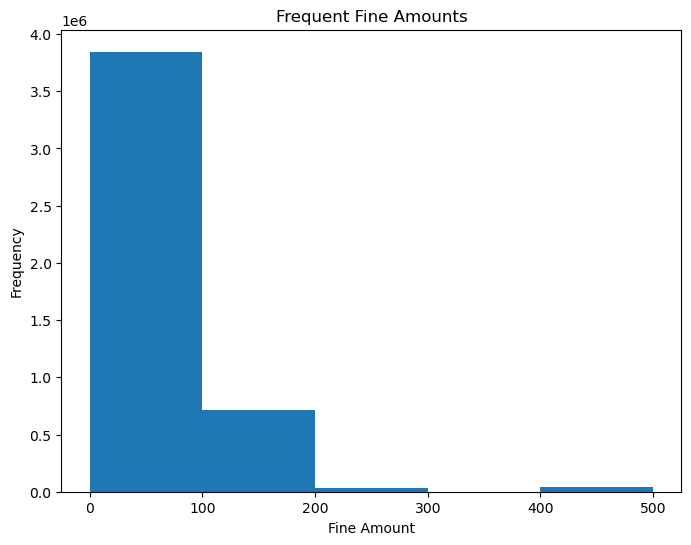

In [38]:
plt.figure(figsize=(8,6))
plt.hist(parking_df['set_fine_amount'].values, bins=5)
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.title('Frequent Fine Amounts')
plt.show()

It shows that most of the tickets were under 100 dollars (almost four million), and around seven hundred thousand were between hundred and two hundred dollars.

Plot a barplot of `set_fine_amount` by `date_of_infraction`.

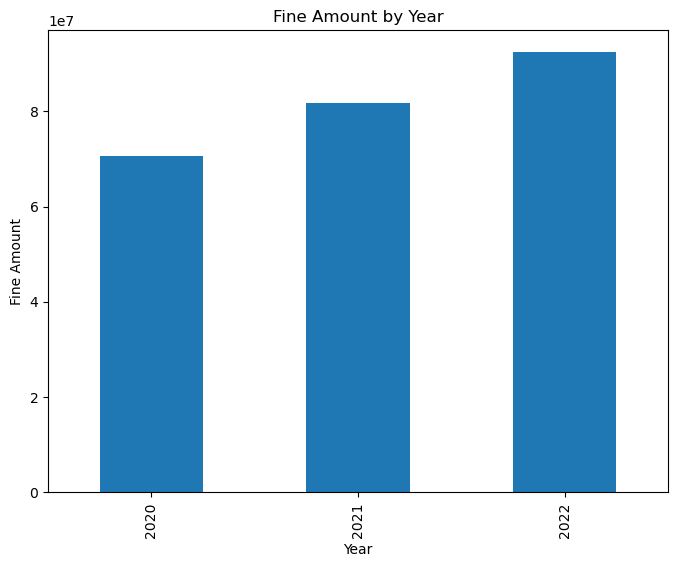

In [39]:
# extract the year from the 'date_of_infraction' column
parking_df['year'] = parking_df['date_of_infraction'].dt.year

# group the data by year and calculate the sum of 'set_fine_amount'
sum_by_year = parking_df.groupby('year')['set_fine_amount'].sum()

# create a barplot
plt.figure(figsize=(8,6))
sum_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Fine Amount')
plt.title('Fine Amount by Year')
plt.show()

Total fines in 2020 were over 70 million dollars, and in 2021, they increased to 80 million. In 2022, the total fines reached 90 million. City data indicates that fines were 124 million in 2019. The decrease in fines in 2020 can be attributed to the Covid-19 pandemic, as people drove less, and the City implemented a more relaxed penalty system.

Plot a line chart of `set_fine_amount` by year and months. Extract year and month from `date_of_infraction`.

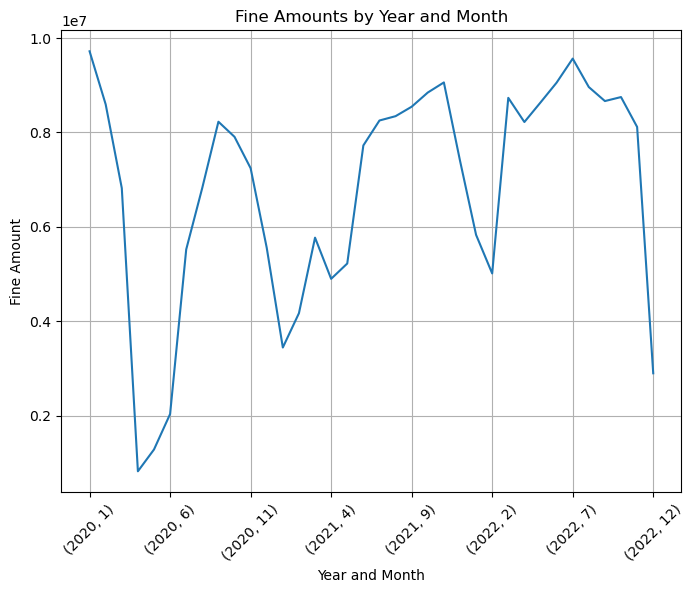

In [40]:
# extract the year and month from the 'date_of_infraction' column
parking_df['year'] = parking_df['date_of_infraction'].dt.year
parking_df['month'] = parking_df['date_of_infraction'].dt.month

# group the data by year and month and calculate the sum of 'set_fine_amount'
sum_by_year_month = parking_df.groupby(['year', 'month'])['set_fine_amount'].sum()

# create a line chart
plt.figure(figsize=(8,6))
sum_by_year_month.plot(kind='line')
plt.xlabel('Year and Month')
plt.ylabel('Fine Amount')
plt.title('Fine Amounts by Year and Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The chart shows a decline in early spring of 2020 when the pandemic started. By the summer months, fines increased drastically. There is also a seasonality trend observed. In the winter months of 2021 and 2022, total fines were lower than in the summer. In the winter of 2021, it was slightly lower than in 2022, which can also be attributed to the Covid-19 pandemic.

## Part 3 - Next Steps

#### SUMMARY OF TO DO'S FOR ADVANCED EDA:

- Inspect the location columns to determine whether some of them can be dropped or if they should be concatenated with other location columns.

- Inspect `location2` addresses to assess whether we can group them by proximity and reduce the number of distinct values

- Inspect `infraction_description` values to assess whether we can group them by some similarity and reduce the number of distinct values

- Inspect `time_of_infraction`, find the problem and convert it to Datetime data type

- Concatenate `date_of_infraction` and `time_of_infraction` columns

- Convert location to Latitude and Longitude

- Statistics and relationships
